## Composition (phyto vs. zoo fractional makeup)

These plots show the **fractional composition of phytoplankton vs. zooplankton groups** after your **time filters**, **spatial scope** (domain / region / station), and **depth selection** are applied. They help answer:

* **Which functional groups dominate?** (e.g., diatoms vs. flagellates; micro vs. meso zoo)
* **How does composition differ between surface and bottom?**
* **What’s the depth-averaged picture vs. a specific target depth?**
* **How does the mix change across seasons, regions, or stations?**

---

### What the functions produce

**All figures are single-axes stacked bar charts** where each bar sums to 1.0 (fractions). Each segment is one variable from the requested phyto/zoo lists.

#### `composition_surface_bottom(...)`

> One figure with **four bars**:

1. Surface Phyto 2) Bottom Phyto 3) Surface Zoo 4) Bottom Zoo
   Use for a compact **surface vs. bottom** comparison for both communities at once.

#### `composition_depth_average_single(...)`

> One figure with **two bars**:

1. Phyto (depth-avg) 2) Zoo (depth-avg)
   Depth-average is across sigma layers (weighted if supported by `select_depth("depth_avg")`; else simple mean over `siglay`).

#### `composition_at_depth_single(z_level=..., tol=...)`

> One figure with **two bars at a target absolute depth**:

1. Phyto (z) 2) Zoo (z)
   Slices at an absolute depth in meters (negative down) using `{"z_m": ..., "tol": ...}`.

---

### How fractions are computed

1. **Resolve variables present** via tolerant name matching.
2. **Pool across time/space/depth** within the chosen filters/scope (sum over all remaining dimensions).
3. **Normalize** each group by its total so bar segments sum to 1.

   * Missing variables are treated as 0 after checking if any finite values exist.
   * If a group has no finite data or total ≤ 0, the corresponding bar is effectively empty.

---

### Preprocessing that all functions apply

* **Time filter** (months/years/date window).
* **Spatial scope** (domain, polygon region, or nearest station).
* **Depth selection** depends on the function: `"surface"`, `"bottom"`, `"depth_avg"`, or an **absolute depth** slice.

---

### Output & labeling

Figures are auto-titled with **mode**, **who** (Domain / Region / Station), and **when** (your time window). Filenames carry the same tags so exports are self-describing. Legends list subgroup names in the order provided.

---

### Good practice & caveats

* Pass **mutually exclusive** group variables so fractions are interpretable.
* Beware **missing variables**—if all are missing, a bar will be empty.
* **Depth averaging** may fall back to an **unweighted** mean if weighted support is unavailable.
* Absolute-depth slicing requires `select_depth` to support dict requests; otherwise a clear error is raised.
* Remember these figures show **relative dominance**; pair with totals (e.g., biomass timeseries/maps) when absolute magnitude matters.


In [4]:
#Setup

BASE_DIR = "/data/proteus1/scratch/yli/project/lake_erie/output_updated_river_var"
FILE_PATTERN = "erie_00??.nc"
FIG_DIR      = "/data/proteus1/scratch/moja/projects/Lake_Erie/fviz-plots/"


STATIONS = [
    ("WE12", 41.90, -83.10),
    ("WE13", 41.80, -83.20),
]

REGIONS = [
    ("Central", {
        "shapefile": "../data/shapefiles/central_basin_single.shp"
    }),
    ("East", {
        "shapefile": "../data/shapefiles/east_basin_single.shp"
    }),
    ("West", {
        "shapefile": "../data/shapefiles/west_basin_single.shp"
    }),
]

# -----------------------------------------------------------------------------
# Groups are handled a bit differently here - define them seperately HERE 
# -----------------------------------------------------------------------------
PHYTO_VARS = ["P1_c", "P2_c", "P4_c"]
ZOO_VARS   = ["Z4_c", "Z5_c", "Z6_c"]


from fvcomersemviz.io import load_from_base
from fvcomersemviz.utils import out_dir, file_prefix
from fvcomersemviz.plot import (
    hr, info, bullet, kv,
    try_register_progress_bar,
    list_files, summarize_files,
    plot_call,
    print_dataset_summary,
    ensure_paths_exist,
    sample_output_listing,
)


import matplotlib.pyplot as plt
from IPython.display import display, Image, SVG
from pathlib import Path



bullet("\nPhytoplankton variables:")
for v in PHYTO_VARS:
    bullet(f"• {v}")

bullet("\nZooplankton variables:")
for v in ZOO_VARS:
    bullet(f"• {v}")

bullet("\nStations (name, lat, lon):")
for s in STATIONS:
    bullet(f"• {s}")

bullet("\nRegions provided:")
for name, spec in REGIONS:
    bullet(f"• {name}: {spec}")
ensure_paths_exist(REGIONS)

#  Discover files
info(" Discovering files")
files = list_files(BASE_DIR, FILE_PATTERN)
summarize_files(files)
if not files:
    print("\nNo files found. Exiting.")
    sys.exit(2)

#  Load dataset
info(" Loading dataset (this may be lazy if Dask is available)")
ds = load_from_base(BASE_DIR, FILE_PATTERN)
bullet("Dataset loaded. Summary:")
print_dataset_summary(ds)

# Where figures will go / filename prefix
out_folder = out_dir(BASE_DIR, FIG_DIR)
prefix = file_prefix(BASE_DIR)
kv("Figure folder", out_folder)
kv("Filename prefix", prefix)



  
  Phytoplankton variables:
  • P1_c
  • P2_c
  • P4_c
  
  Zooplankton variables:
  • Z4_c
  • Z5_c
  • Z6_c
  
  Stations (name, lat, lon):
  • ('WE12', 41.9, -83.1)
  • ('WE13', 41.8, -83.2)
  
  Regions provided:
  • Central: {'shapefile': '../data/shapefiles/central_basin_single.shp'}
  • East: {'shapefile': '../data/shapefiles/east_basin_single.shp'}
  • West: {'shapefile': '../data/shapefiles/west_basin_single.shp'}

 Discovering files
------------------------------------------------------------------------------
  - Matched files      3
  • /data/proteus1/scratch/yli/project/lake_erie/output_updated_river_var/erie_0001.nc
  • /data/proteus1/scratch/yli/project/lake_erie/output_updated_river_var/erie_0002.nc
  • /data/proteus1/scratch/yli/project/lake_erie/output_updated_river_var/erie_0003.nc

 Loading dataset (this may be lazy if Dask is available)
------------------------------------------------------------------------------
[io] Trying engine='scipy' for open_mfdataset …
[


 Example 1: DOMAIN • JJA 2018 • Surface/Bottom composition
------------------------------------------------------------------------------
  Produces stacked bars: [Surface Phyto | Surface Zoo] ; [Bottom Phyto | Bottom Zoo]

 Example 2: REGION(Central) • Apr–Oct 2018 • Surface/Bottom composition
------------------------------------------------------------------------------

 Example 3: DOMAIN • JJA 2018 • Depth-averaged composition
------------------------------------------------------------------------------
  Depth-average computed across ALL sigma layers (weighted by 'layer_thickness' if available; else simple mean)

 Example 4: STATION(WE12) • JJA 2018 • Composition at z=-10 m
------------------------------------------------------------------------------
 Composition examples completed. Figures saved under: /data/proteus1/scratch/moja/projects/Lake_Erie/fviz-plots/
Showing the latest 4 composition plot(s) from /data/proteus1/scratch/moja/projects/Lake_Erie/fviz-plots/output_updated

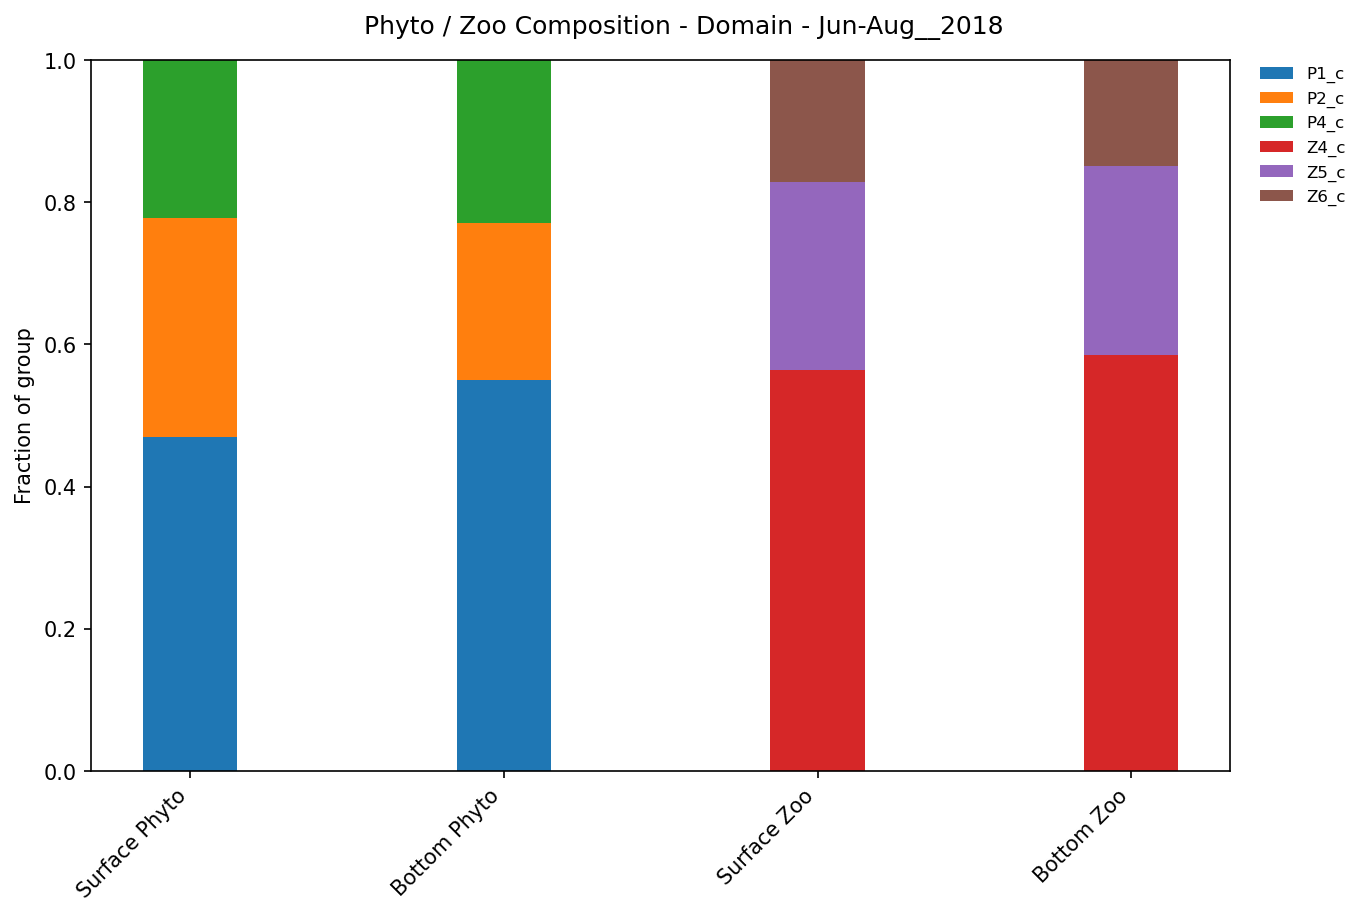

• composition/output_updated_river_var__Composition__SurfBottom__Central__Apr-Oct__2018.png


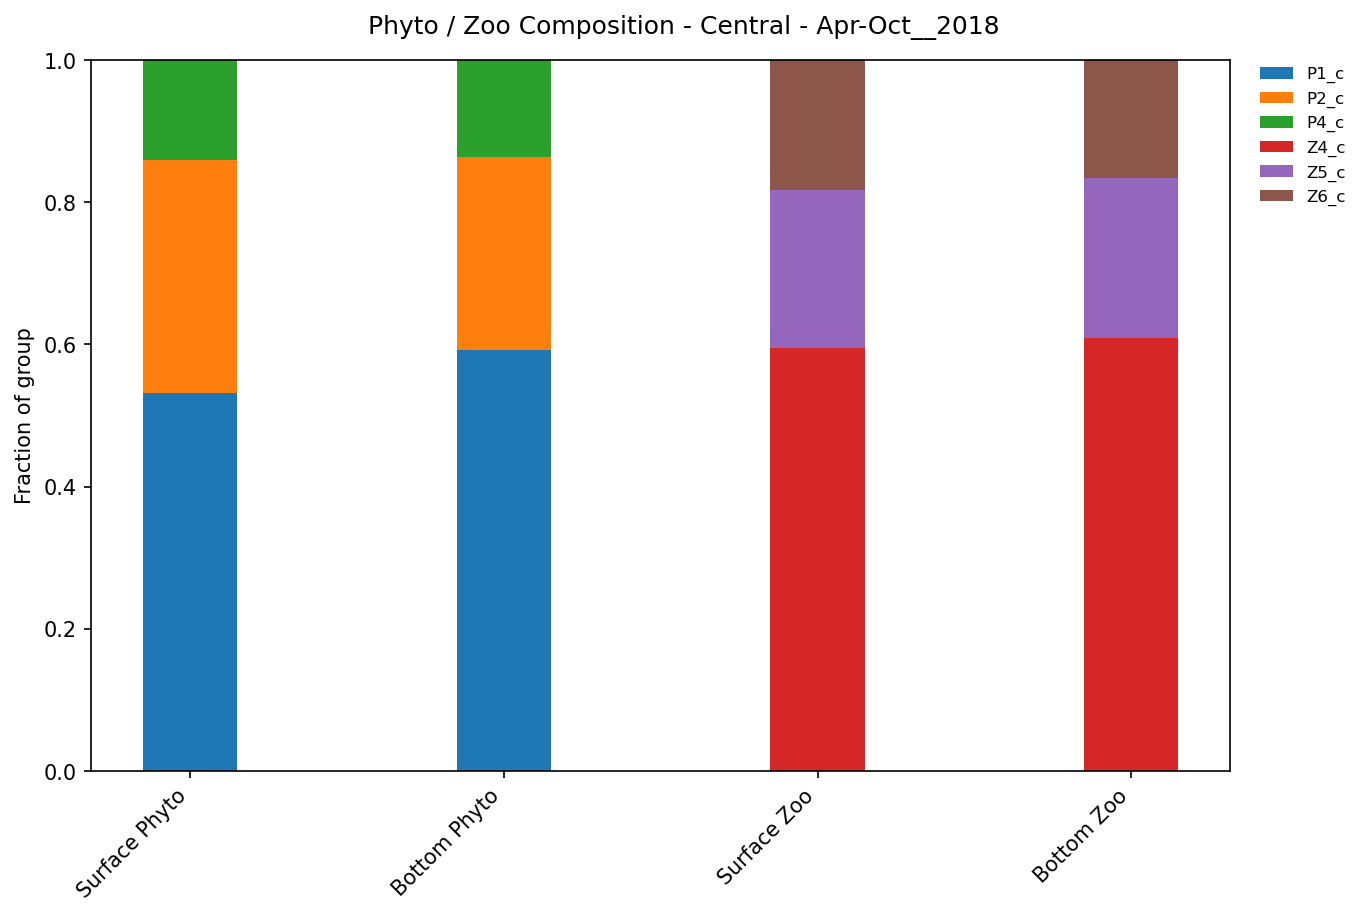

• composition/output_updated_river_var__Composition__DepthAvg__Domain__Jun-Aug__2018.png


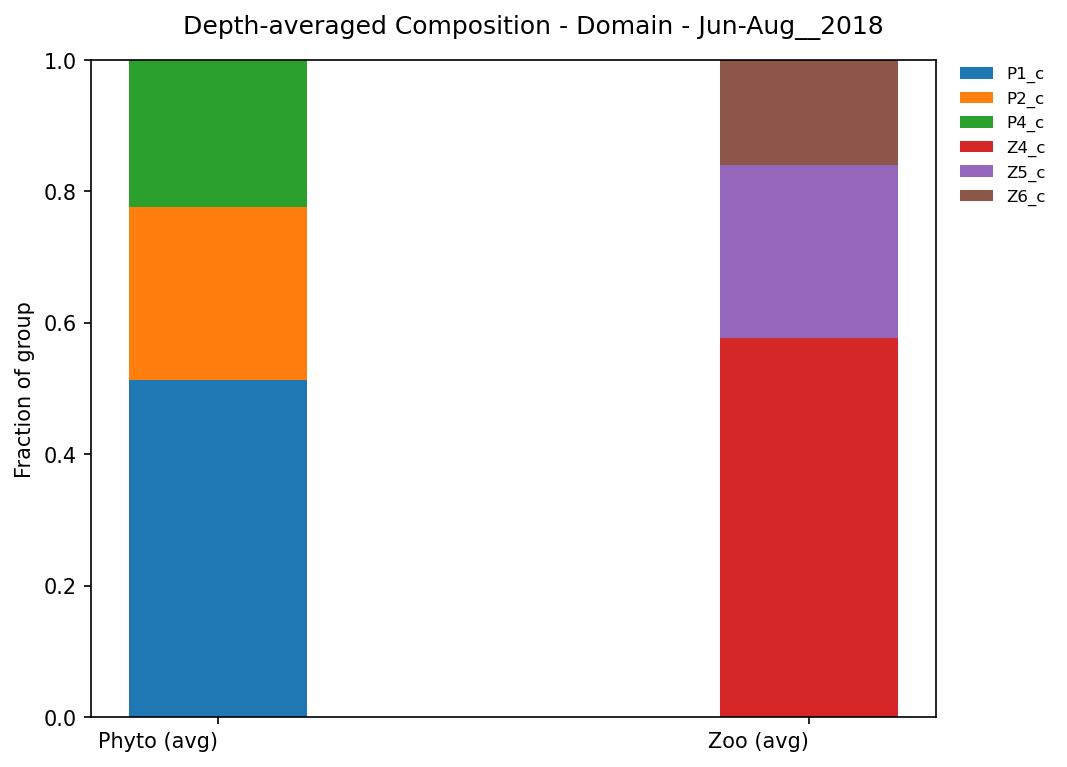

• composition/output_updated_river_var__Composition__z10.0m__Station_WE12__Jun-Aug__2018.png


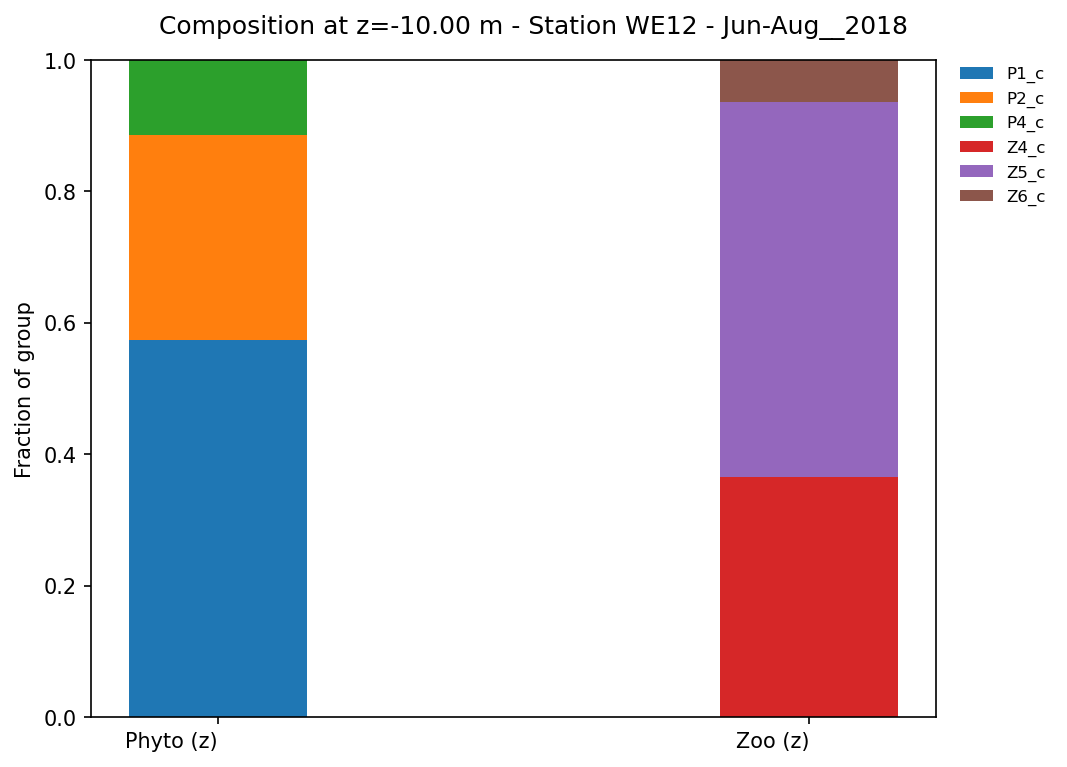

In [17]:
# --- Composition (phyto vs. zoo) ---


from fvcomersemviz.plots.composition import (
    composition_surface_bottom,
    composition_depth_average_single,
    composition_at_depth_single,
)


# --- Composition (fractional makeup) reference ---

# composition_surface_bottom
#
# Full argument reference for composition_surface_bottom(...)
# Renders one figure with FOUR stacked bars showing fractional group composition:
# [Surface Phyto, Bottom Phyto, Surface Zoo, Bottom Zoo].
#
# def composition_surface_bottom(
#     ds: xr.Dataset,                               # FVCOM–ERSEM dataset (already opened/combined).
#     *,
#     months: Optional[List[int]] = None,           # Time filter by month numbers (1–12). Combineable with years/start/end.
#     years: Optional[List[int]] = None,            # Time filter by calendar years (e.g., [2018, 2019]).
#     start_date: Optional[str] = None,             # Inclusive lower bound date "YYYY-MM-DD".
#     end_date: Optional[str] = None,               # Inclusive upper bound date "YYYY-MM-DD".
#     region: Optional[Tuple[str, Dict[str, Any]]] = None,   # Spatial polygon scope: (region_name, region_spec).
#     station: Optional[Tuple[str, float, float]] = None,    # Spatial point scope: (station_name, lat, lon).
#                                                           # Provide at most one of region/station; if neither → Domain.
#     base_dir: str,                                  # Model run root; drives file_prefix() and output folder naming.
#     figures_root: str,                              # Root folder for figure outputs (package will create subfolders).
#     phyto_vars: Sequence[str],                      # Candidate phytoplankton variables; only present ones are used.
#     zoo_vars: Sequence[str],                        # Candidate zooplankton variables; only present ones are used.
#     dpi: int = 150,                                 # PNG resolution.
#     figsize: Tuple[float, float]] = (9, 6),         # Figure size in inches.
#     verbose: bool = False,                          # Print progress / save path / tolerant warnings.
# ) -> None:
#     pass  # Internals:
#           # 1) filter_time(...) → apply_scope(...) to get the scoped dataset.
#           # 2) resolve_available_vars(...) filters phyto_vars/zoo_vars to those present.
#           # 3) select_depth(..., "surface") and select_depth(..., "bottom").
#           # 4) For each bar, pool with sum_over_all_dims(...) then normalize to fractions.
#           # 5) Draw four stacked bars via stacked_fraction_bars(...).
#           # 6) Auto-title "<Phyto / Zoo Composition – Who – When>".
#           # 7) Save PNG and close figure.
#
# Output path pattern:
#   <figures_root>/<basename(base_dir)>/
#     <prefix>__Composition__SurfBottom__<ScopeTag>__<TimeTag>.png
#
# where:
#   <prefix>    = file_prefix(base_dir)
#   <ScopeTag>  = Domain | <RegionName> | Station_<Name>
#   <TimeTag>   = built by build_time_window_label(...) from months/years/start/end
#
# Notes:
# - Bars show FRACTIONS (each bar sums to 1). Missing variables → NaN → treated as 0 if any finite data exist.
# - If a group totals to ≤ 0 or all-NaN, that bar is effectively empty.
# - X ticks are rotated 45° to fit the four bar names.
# - Returns None (always writes a PNG).
# - Directory is created if needed; verbose=True prints the final path.


# composition_depth_average_single
#
# Full argument reference for composition_depth_average_single(...)
# Renders one figure with TWO stacked bars showing depth-AVERAGED fractional composition:
# [Phyto (avg), Zoo (avg)].
#
# def composition_depth_average_single(
#     ds: xr.Dataset,                               # FVCOM–ERSEM dataset.
#     *,
#     months: Optional[List[int]] = None,           # Time filter by months.
#     years: Optional[List[int]] = None,            # Time filter by years.
#     start_date: Optional[str] = None,             # Inclusive start date "YYYY-MM-DD".
#     end_date: Optional[str] = None,               # Inclusive end date "YYYY-MM-DD".
#     region: Optional[Tuple[str, Dict[str, Any]]] = None,   # Polygon scope (region_name, region_spec).
#     station: Optional[Tuple[str, float, float]] = None,    # Point scope (station_name, lat, lon).
#     base_dir: str,                                  # Model run root; used for prefix and output path.
#     figures_root: str,                              # Output root folder.
#     phyto_vars: Sequence[str],                      # Phytoplankton variable names (subset used if present).
#     zoo_vars: Sequence[str],                        # Zooplankton variable names (subset used if present).
#     dpi: int = 150,                                 # PNG resolution.
#     figsize: Tuple[float, float]] = (7, 5),         # Figure size in inches.
#     verbose: bool = False,                          # Verbose logging toggle.
# ) -> None:
#     pass  # Internals:
#           # 1) filter_time(...) → apply_scope(...).
#           # 2) resolve_available_vars(...) for phyto/zoo groups.
#           # 3) Depth-average:
#           #      try: select_depth(..., "depth_avg")  # may be thickness-weighted
#           #      except: mean over "siglay" if present; else leave dataset unchanged.
#           # 4) Pool over remaining dims → normalize to fractions per group.
#           # 5) Draw two stacked bars (bar_width=0.30, legend docked outside).
#           # 6) Title "Depth-averaged Composition – Who – When".
#           # 7) Save PNG and close figure.
#
# Output path pattern:
#   <figures_root>/<basename(base_dir)>/
#     <prefix>__Composition__DepthAvg__<ScopeTag>__<TimeTag>.png
#
# Notes:
# - Attempts weighted depth average if select_depth("depth_avg") supports it; otherwise falls back to unweighted
#   mean across "siglay".
# - Fractions/handling of missing variables are identical to the surface/bottom function.
# - Returns None (always writes a PNG). Legend placed outside by default for readability.


# composition_at_depth_single
#
# Full argument reference for composition_at_depth_single(...)
# Renders one figure with TWO stacked bars at a TARGET ABSOLUTE DEPTH:
# [Phyto (z), Zoo (z)].
#
# def composition_at_depth_single(
#     ds: xr.Dataset,                               # FVCOM–ERSEM dataset.
#     *,
#     z_level: float,                               # Absolute depth in meters (negative is downward, e.g., -10.0).
#     tol: float = 0.75,                            # ± meters tolerance for nearest-layer match to z_level.
#     months: Optional[List[int]] = None,           # Time filter by months.
#     years: Optional[List[int]] = None,            # Time filter by years.
#     start_date: Optional[str] = None,             # Inclusive start date "YYYY-MM-DD".
#     end_date: Optional[str] = None,               # Inclusive end date "YYYY-MM-DD".
#     region: Optional[Tuple[str, Dict[str, Any]]] = None,   # Polygon scope (region_name, region_spec).
#     station: Optional[Tuple[str, float, float]] = None,    # Point scope (station_name, lat, lon).
#     base_dir: str,                                  # Model run root; used for prefix and output path.
#     figures_root: str,                              # Output root folder.
#     phyto_vars: Sequence[str],                      # Phytoplankton variable names (subset used if present).
#     zoo_vars: Sequence[str],                        # Zooplankton variable names (subset used if present).
#     dpi: int = 150,                                 # PNG resolution.
#     figsize: Tuple[float, float]] = (7, 5),         # Figure size in inches.
#     verbose: bool = False,                          # Verbose logging toggle.
# ) -> None:
#     pass  # Internals:
#           # 1) filter_time(...) → apply_scope(...).
#           # 2) resolve_available_vars(...) for phyto/zoo groups.
#           # 3) select_depth(..., {"z_m": float(z_level), "tol": float(tol)}).
#           #    - If select_depth lacks dict API or no layer within tolerance: raise RuntimeError with context.
#           # 4) Pool over remaining dims → normalize to fractions per group.
#           # 5) Draw two stacked bars (bar_width=0.30, legend docked outside).
#           # 6) Title "Composition at z=<z_level> m – Who – When".
#           # 7) Save PNG and close figure.
#
# Output path pattern:
#   <figures_root>/<basename(base_dir)>/
#     <prefix>__Composition__z<abs(z_level):.1f>m__<ScopeTag>__<TimeTag>.png
#
# Notes:
# - Requires select_depth to support absolute-depth dict: {"z_m": ..., "tol": ...}.
# - Negative depths indicate meters below surface. If no layer is found within ±tol, a RuntimeError is raised.
# - Fractions/handling of missing variables are identical to other composition functions.
# - Returns None (always writes a PNG).


# Shared behavior (all three):
# - Time filtering via filter_time(...) THEN spatial scoping via apply_scope(...).
# - Fractions computed by summing over all remaining dims (sum_over_all_dims) and normalizing within each group.
# - Figure titling uses:
#     Who  = "Domain" | region_name | "Station <Name>"
#     When = build_time_window_label(months, years, start_date, end_date)
# - Legends list subgroup labels in the order provided; duplicates across bars share labels.
# - Directories are created on demand; verbose=True prints the saved path.

# Examples:


# 1) DOMAIN • JJA 2018 • Surface/Bottom composition
info(" Example 1: DOMAIN • JJA 2018 • Surface/Bottom composition")
bullet("Produces stacked bars: [Surface Phyto | Surface Zoo] ; [Bottom Phyto | Bottom Zoo]")
composition_surface_bottom(
    ds=ds,
    months=[6,7,8], years=[2018],
    region=None, station=None,
    base_dir=BASE_DIR, figures_root=FIG_DIR,
    phyto_vars=PHYTO_VARS, zoo_vars=ZOO_VARS,
)

# =========================================================================
# 2) REGION (Central) • Apr–Oct 2018 • Surface/Bottom composition
# =========================================================================
info(" Example 2: REGION(Central) • Apr–Oct 2018 • Surface/Bottom composition")
composition_surface_bottom(
    ds=ds,
    months=[4,5,6,7,8,9,10], years=[2018],
    region=REGIONS[0], station=None,
    base_dir=BASE_DIR, figures_root=FIG_DIR,
    phyto_vars=PHYTO_VARS, zoo_vars=ZOO_VARS,
)

# =========================================================================
# 3) DOMAIN • JJA 2018 • Depth-averaged composition
# =========================================================================
info(" Example 3: DOMAIN • JJA 2018 • Depth-averaged composition")
bullet("Depth-average computed across ALL sigma layers (weighted by 'layer_thickness' if available; else simple mean)")
composition_depth_average_single(
    ds=ds,
    months=[6,7,8], years=[2018],
    region=None, station=None,
    base_dir=BASE_DIR, figures_root=FIG_DIR,
    phyto_vars=PHYTO_VARS, zoo_vars=ZOO_VARS,
)

# =========================================================================
# 4) STATION (WE12) • JJA 2018 • Composition at selected depth
# =========================================================================
info(" Example 4: STATION(WE12) • JJA 2018 • Composition at z=-10 m")
composition_at_depth_single(
    ds=ds,
    z_level=-10.0, tol=0.75,
    months=[6,7,8], years=[2018],
    region=None, station=STATIONS[0],
    base_dir=BASE_DIR, figures_root=FIG_DIR,
    phyto_vars=PHYTO_VARS, zoo_vars=ZOO_VARS,
)

print(" Composition examples completed. Figures saved under:", FIG_DIR)

# ---- Inline preview: show composition images from this run ----
from pathlib import Path
from IPython.display import Image, SVG, display

RUN_ROOT = Path(FIG_DIR) / Path(BASE_DIR).name       # <FIG_DIR>/<basename(BASE_DIR)>
COMPO_DIR = RUN_ROOT / "composition"
search_root = COMPO_DIR if COMPO_DIR.exists() else RUN_ROOT

files = sorted(
    list(search_root.rglob("*.png")) + list(search_root.rglob("*.svg")),
    key=lambda p: p.stat().st_mtime,
)

if not files:
    print(f"No composition images found under {search_root}")
else:
    N = 8
    print(f"Showing the latest {min(N, len(files))} composition plot(s) from {search_root}:")
    for p in files[-N:]:
        print("•", p.relative_to(RUN_ROOT))
        if p.suffix.lower() == ".svg":
            display(SVG(filename=str(p)))
        else:
            display(Image(filename=str(p)))
